In [30]:
import datetime
import json
import pandas as pd
import requests

# Download historical supplies in chunks (~90 days at a time)
start_date=1498867200 # 2017/07/01 00:00:00
last_date=1569508217  # 2019/09/26 14:30:17

token_address="0xb8c77482e45f1f44de1745f52c74426c631bdd52" # BNB token
headers = {'content-type': 'application/json', 'x-api-key': '<ENTER_YOUR_API_KEY_HERE>'}
frames = []

while (start_date < last_date):
    end_date = start_date + 7948800 # ~90 days
    if (end_date > last_date):
        end_date = last_date
    print(start_date, end_date)

    # Download historical supplies
    url = "https://web3api.io/api/v1/tokens/" + token_address + "/supplies/historical?startDate=" + str(start_date) + "&endDate=" + str(end_date)
    response = requests.get(url, headers=headers, verify=True)
    if (not response.ok): # response.content, response.status_code
        response.raise_for_status()

    # Parse JSON data & save into array
    jData = json.loads(response.content)
    df = pd.DataFrame(jData['payload']['data'], columns=jData['payload']['metadata']['columns'])
    frames.append(df)
    
    start_date = end_date

# Concatenate all frames together
df = pd.concat(frames, sort=False)
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000))
df['circulatingSupply'] = df['circulatingSupply'].astype('float64')
df['totalSupply'] = df['totalSupply'].astype('float64')
df.head(5)

1498867200 1506816000
1506816000 1514764800
1514764800 1522713600
1522713600 1530662400
1530662400 1538611200
1538611200 1546560000
1546560000 1554508800
1554508800 1562457600
1562457600 1569508217


,timestamp,numHolders,circulatingSupply,totalSupply
0,2017-06-30 17:00:00,0,0.0,0.0
1,2017-07-01 17:00:00,0,0.0,0.0
2,2017-07-02 17:00:00,0,0.0,0.0
3,2017-07-03 17:00:00,0,0.0,0.0
4,2017-07-04 17:00:00,0,0.0,0.0


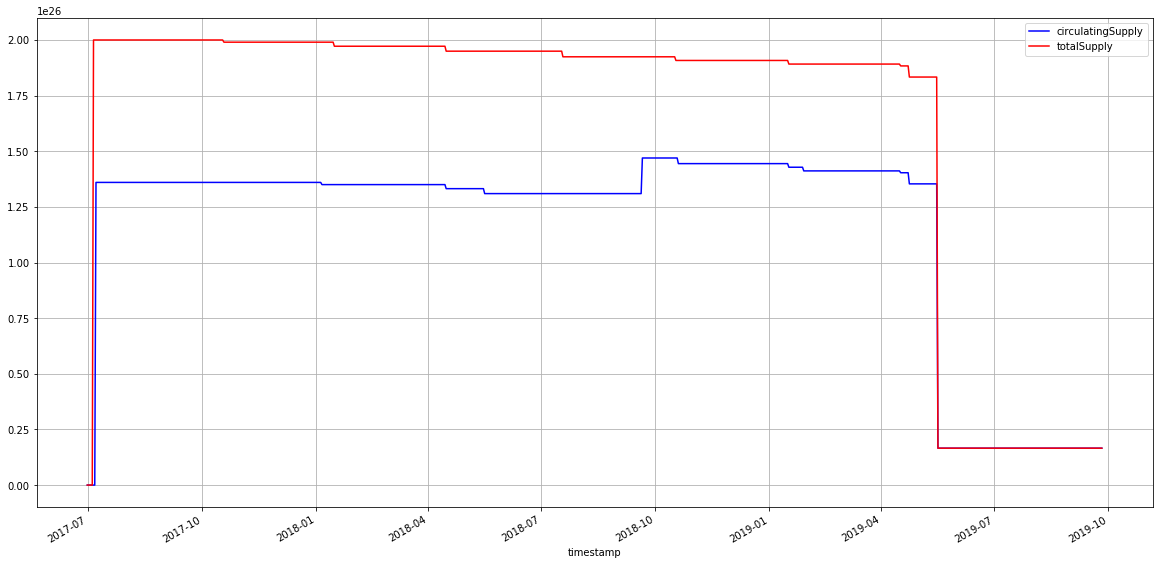

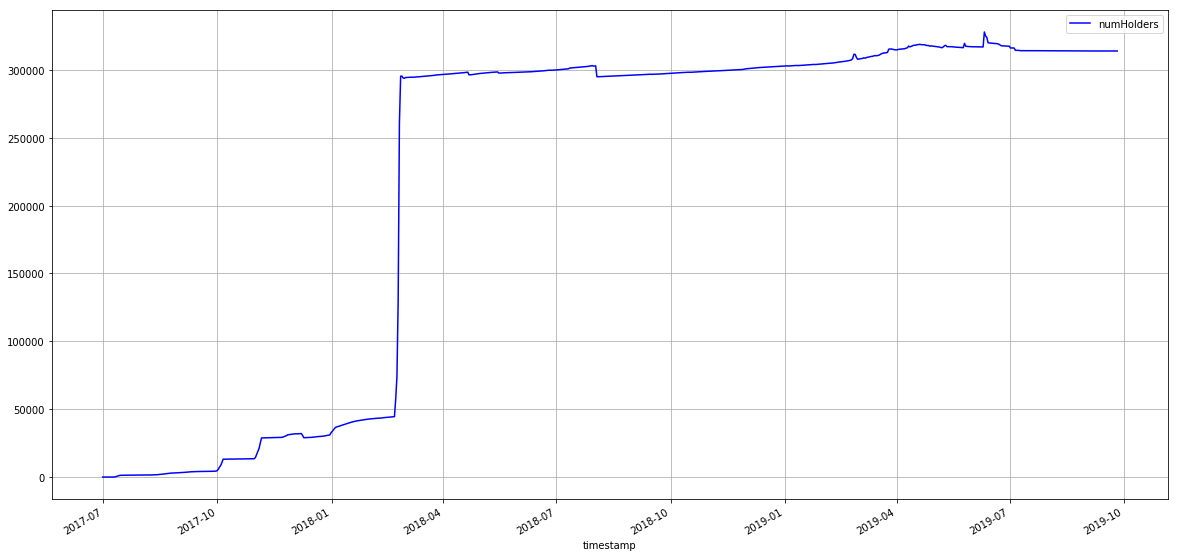

In [31]:
import matplotlib.pyplot as plt

# Plot circulating and total supplies time series
fig, ax = plt.subplots(figsize=(20, 10))
ax = df.plot(ax=ax, kind='line', x='timestamp', y='circulatingSupply', c='Blue', grid=True, style='b')
ax = df.plot(ax=ax, kind='line', x='timestamp', y='totalSupply',       c='Red',  grid=True, style='b')
plt.show()

# Plot num holders time series
fig, ax = plt.subplots(figsize=(20, 10))
ax = df.plot(ax=ax, kind='line', x='timestamp', y='numHolders', c='Blue', grid=True, style='b')
plt.show()